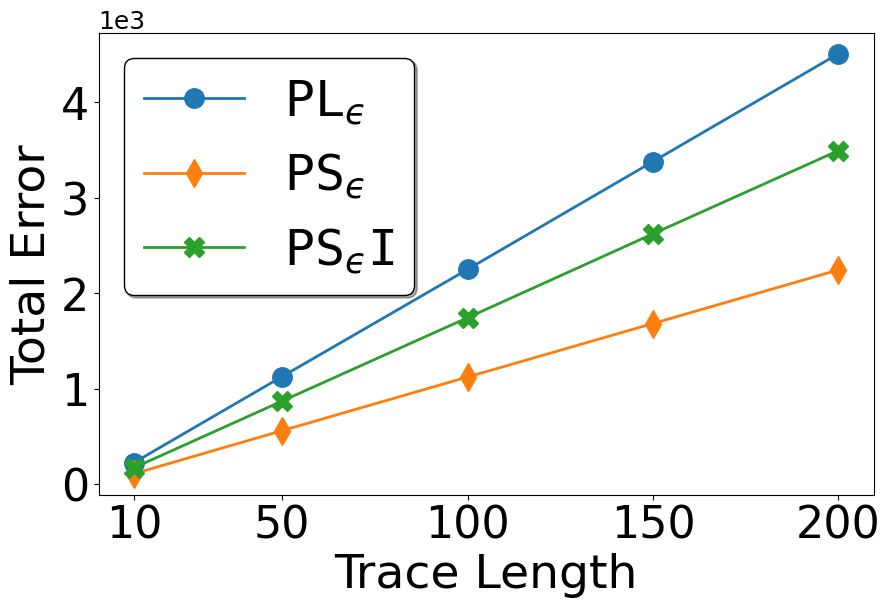

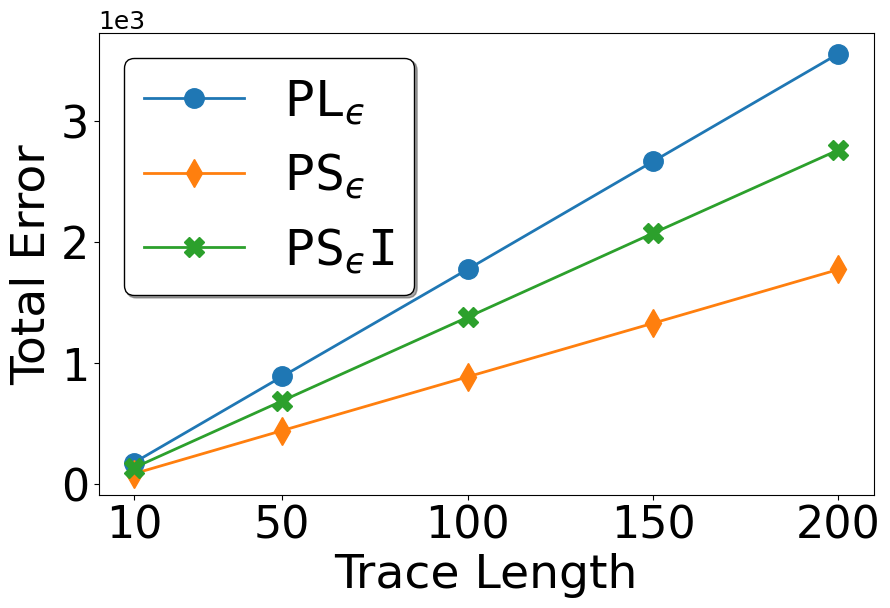

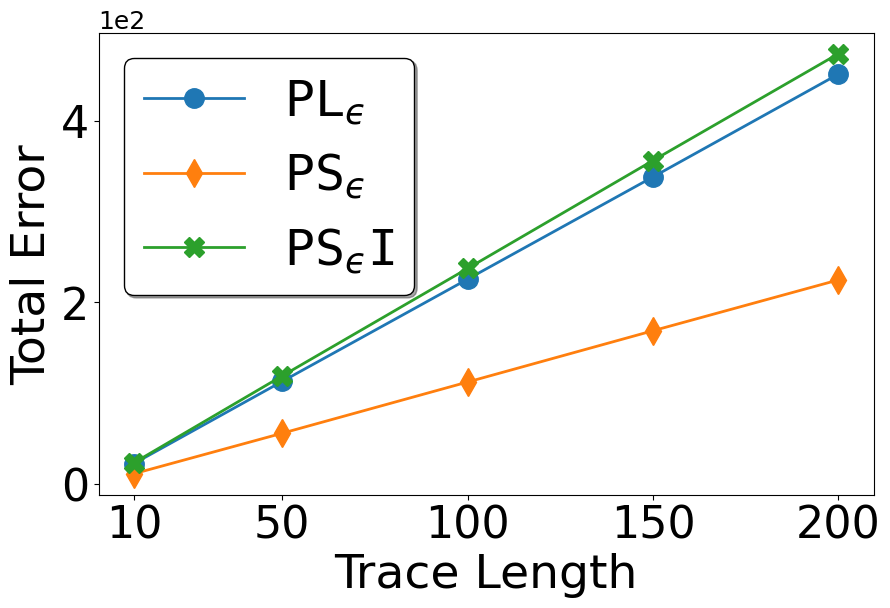

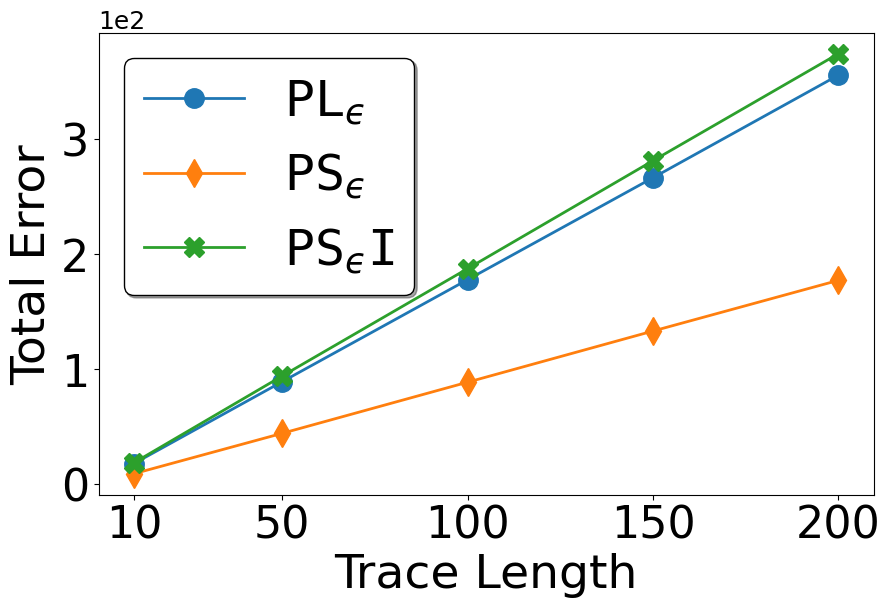

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ss6365\\Desktop\\location_privacy_ndss\\geolife\\perturbed\\laplace\\merged_laplace_5.csv'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

def calculate_overall_averages(file_path, subset_sizes):
    df = pd.read_csv(file_path)
    averages_l2 = {size: [] for size in subset_sizes}
    averages_l1 = {size: [] for size in subset_sizes}

    for identifier, group in df.groupby('identifier'):
        for size in subset_sizes:
            if len(group) >= size:
                sum_distance_l2 = group['l2_distance'].iloc[:size].sum()
                averages_l2[size].append(sum_distance_l2)
                sum_distance_l1 = group['l1_distance'].iloc[:size].sum()
                averages_l1[size].append(sum_distance_l1)

    overall_averages_l2 = {size: np.sum(values) / len(values) if values else None for size, values in averages_l2.items()}
    overall_averages_l1 = {size: np.sum(values) / len(values) if values else None for size, values in averages_l1.items()}

    return list(overall_averages_l2.values()), list(overall_averages_l1.values())

def plot_and_save(averages, subset_sizes, figure_base_dir, dataset_name, epsilon, distance_type):
    plt.figure(figsize=(10, 6))
    colors = ['#1F77B4', '#FF7F0E', '#2CA02C']
    markers = ['o', 'd', 'X']
    labels = [r'$\mathtt{PL}_ϵ$', r'$\mathtt{PS}_ϵ$', r'$\mathtt{PS}_ϵ\mathtt{I}$']

    if distance_type == 'L2':
        ylabel = 'Total Error'

    else:
        ylabel= 'Total Error'
        
    for average, color, marker, label in zip(averages, colors, markers, labels):
        plt.plot(subset_sizes, average, label=label, color=color, marker=marker, linestyle='solid', linewidth=2, markersize=14)
    
    plt.xlabel('Trace Length', fontsize=34)
    plt.ylabel(ylabel, fontsize=34)
    plt.xticks(subset_sizes, labels=[str(val) for val in subset_sizes])
    plt.tick_params(axis='both', which='major', labelsize=32)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.gca().yaxis.get_offset_text().set_size(18)
    #plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.7)

    plt.legend(fontsize=36, frameon=True, shadow=True).get_frame().set_edgecolor('black')
    #plt.legend(fontsize=28, frameon=True)

    #plt.tight_layout()

    # Ensuring the epsilon value is correctly used in the filename
    filename_suffix = f'{distance_type.lower()}_distance_e={epsilon}'
    dir_png = os.path.join(figure_base_dir, dataset_name, 'figure', 'png')
    dir_svg = os.path.join(figure_base_dir, dataset_name, 'figure', 'svg')
    os.makedirs(dir_png, exist_ok=True)
    os.makedirs(dir_svg, exist_ok=True)
    pathpng = os.path.join(dir_png, f'{dataset_name}_{filename_suffix}.png')
    pathsvg = os.path.join(dir_svg, f'{dataset_name}_{filename_suffix}.svg')
    
    plt.savefig(pathpng, dpi=300, bbox_inches='tight')
    plt.savefig(pathsvg, format='svg', bbox_inches='tight')
    plt.show()
    plt.close()

# Usage
base_dir = "C:\\Users\\ss6365\\Desktop\\location_privacy_ndss"
dataset_name = 'geolife'  # Example dataset
epsilon_values = [0.1, 1, 5]  # Example epsilon values

# Iterate through different epsilon values
for epsilon in epsilon_values:
    # Calculating averages for all methods
    averages_l2_all = []
    averages_l1_all = []
    subset_sizes = [10, 50, 100, 150, 200]
    methods = ['laplace', 'staircase', 'our_bl_50_delta_5']
    for method in methods:
        file_path = os.path.join(base_dir, dataset_name, 'perturbed', method, f'merged_{method}_{epsilon}.csv')
        l2, l1 = calculate_overall_averages(file_path, subset_sizes)
        averages_l2_all.append(l2)
        averages_l1_all.append(l1)
        
    
    # Plot and save L1 distances for each epsilon
    plot_and_save(averages_l1_all, subset_sizes, base_dir, dataset_name, epsilon, 'L1')
    plot_and_save(averages_l2_all, subset_sizes, base_dir, dataset_name, epsilon, 'L2')

